Best threshold by F1: 0.50, F1 = 0.484, Accuracy = 0.840
              precision    recall  f1-score   support

   No Attack       0.96      0.85      0.91       179
      Attack       0.37      0.71      0.48        21

    accuracy                           0.84       200
   macro avg       0.66      0.78      0.69       200
weighted avg       0.90      0.84      0.86       200



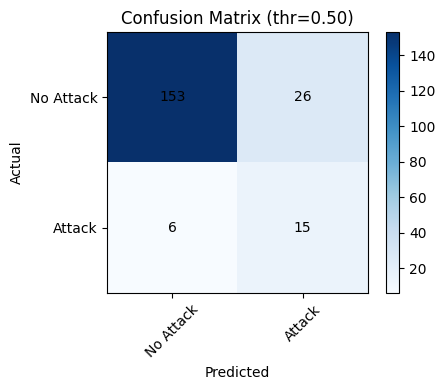

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('updated_version.csv')
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:,1]

thresholds = np.linspace(0.1, 0.9, 81)
f1s = [f1_score(y_test, y_proba >= t) for t in thresholds]
best_idx = np.argmax(f1s)
best_thr = thresholds[best_idx]

y_pred = (y_proba >= best_thr).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"Best threshold by F1: {best_thr:.2f}, F1 = {f1s[best_idx]:.3f}, Accuracy = {acc:.3f}")
print(classification_report(y_test, y_pred, target_names=['No Attack','Attack']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.xticks([0,1], ['No Attack','Attack'], rotation=45)
plt.yticks([0,1], ['No Attack','Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (thr={best_thr:.2f})')
plt.colorbar()
plt.tight_layout()
plt.show()
